In [300]:
import scipy.signal as sig
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [311]:
N = 700
Fc = 0.008
Tc = 8.03
x = np.linspace(-(Tc/2), Tc/2, 11025)
freq = 2
ts = 2*np.pi * freq * x
signal = np.sin(ts)
signal_n = signal + np.random.randn(len(x)) * 0.8

In [312]:
b = sig.firwin(N, Fc, window='boxcar')
w, h = sig.freqz(b)
signal_f = sig.lfilter(b, 1.0, signal_n)

Text(0.5,0,'Sample N')

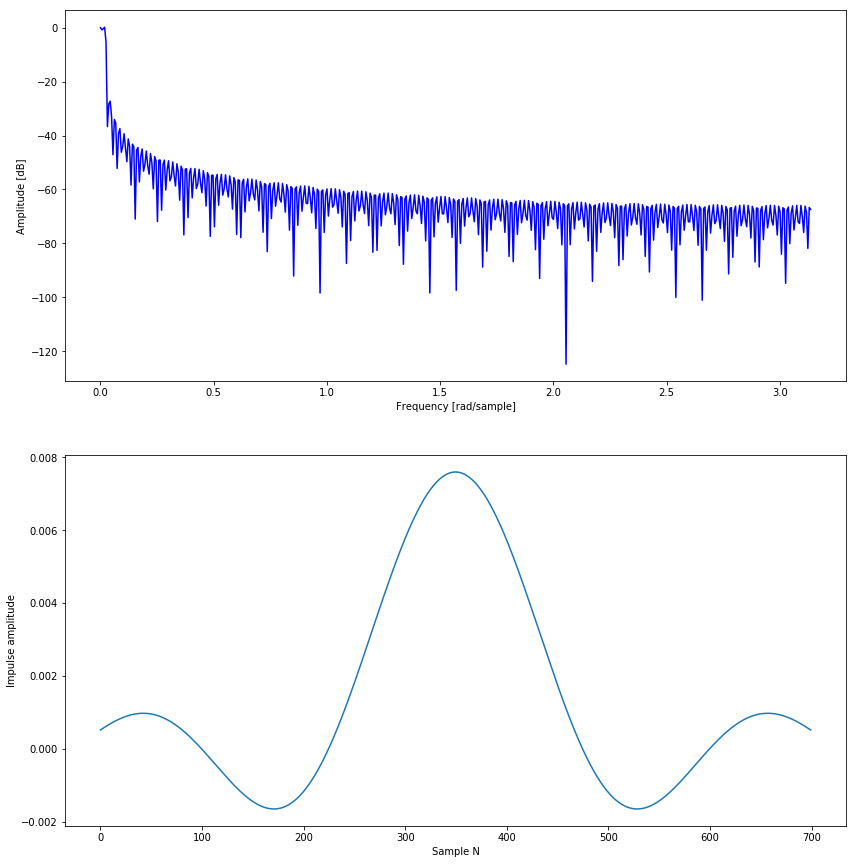

In [ ]:
plt.subplot(211)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.subplot(212)
plt.plot(b)
plt.ylabel('Impulse amplitude')
plt.xlabel('Sample N')
plt.grid()

[-3.5, 3.5, -3.5, 3.5]

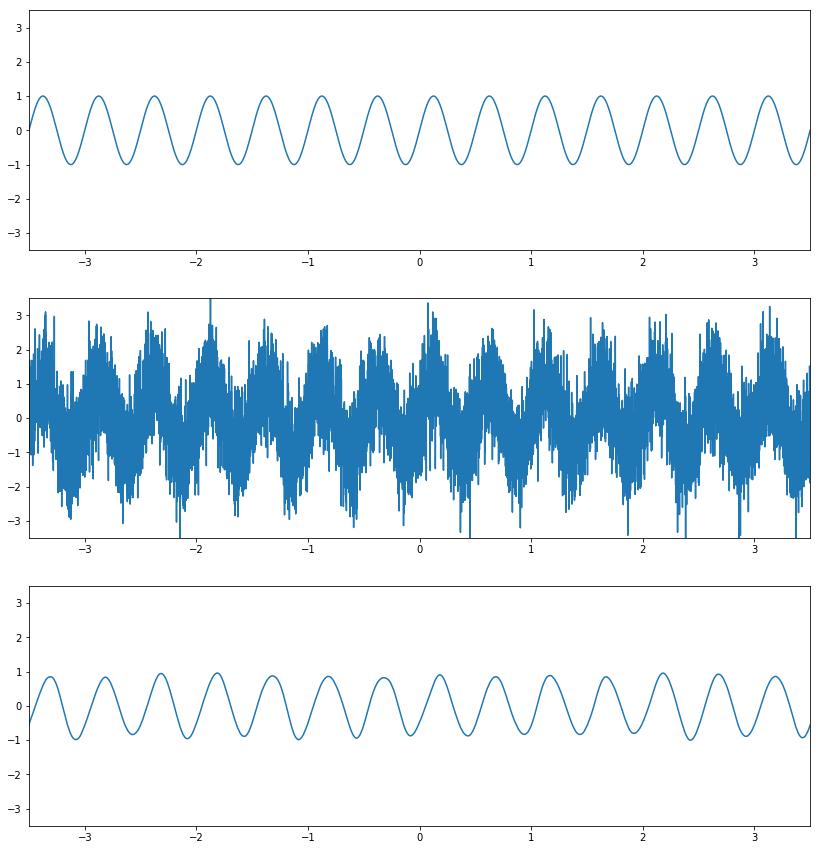

In [314]:
plt.rcParams["figure.figsize"] = [14, 15]
plt.subplot(311)
plt.plot(x, signal)
plt.axis([-3.5, 3.5, -3.5, 3.5])

plt.subplot(312)
plt.plot(x, signal_n)
plt.axis([-3.5, 3.5, -3.5, 3.5])

plt.subplot(313)
plt.plot(x-0.2, signal_f)
plt.axis([-3.5, 3.5, -3.5, 3.5])

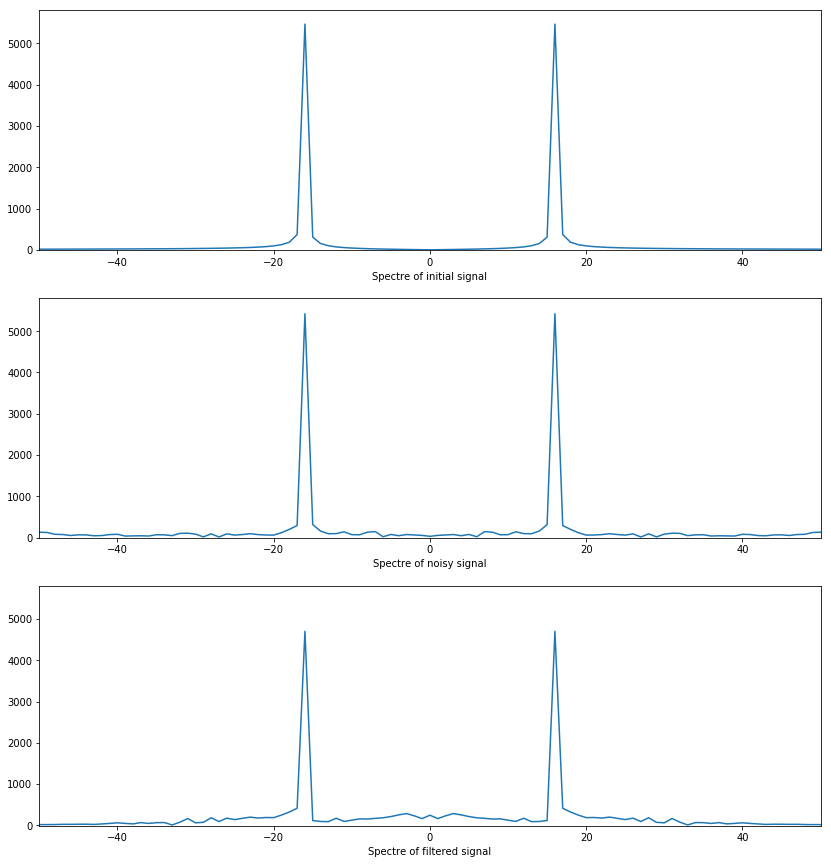

In [322]:
n = len(signal)
d = 1 / x.size
hs = np.fft.fft(signal)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(3,1,1)
plt.xlabel('Spectre of initial signal')
plt.axis([-50, 50, -10, 5800])
plt.plot(fs, amps)

n = len(signal_n)
d = 1 / x.size
hs = np.fft.fft(signal_n)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(3,1,2)
plt.xlabel('Spectre of noisy signal')
plt.axis([-50, 50, -10, 5800])
plt.plot(fs, amps)

n = len(signal_f)
d = 1 / x.size
hs = np.fft.fft(signal_f)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(3,1,3)
plt.xlabel('Spectre of filtered signal')
plt.axis([-50, 50, -10, 5800])
plt.plot(fs, amps)